In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import dask.dataframe as dd
from toolbox.data_aggregation import *

In [2]:
train_dd = dd.read_csv("data/train.csv")

In [3]:
some_store_nbr = 25
some_item_nbr = 103665
%time some_item_data = fetch_item_data_by_store(train_dd, some_item_nbr, some_store_nbr)

C:\Users\xiaoyu\.edm\envs\mle3\lib\site-packages\dask\local.py:290: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  result = _execute_task(task, data)


Wall time: 52.5 s


In [4]:
some_item_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1142 entries, 0 to 72316
Data columns (total 3 columns):
date           1142 non-null datetime64[ns]
unit_sales     1142 non-null float64
onpromotion    789 non-null float64
dtypes: datetime64[ns](1), float64(2)
memory usage: 35.7 KB


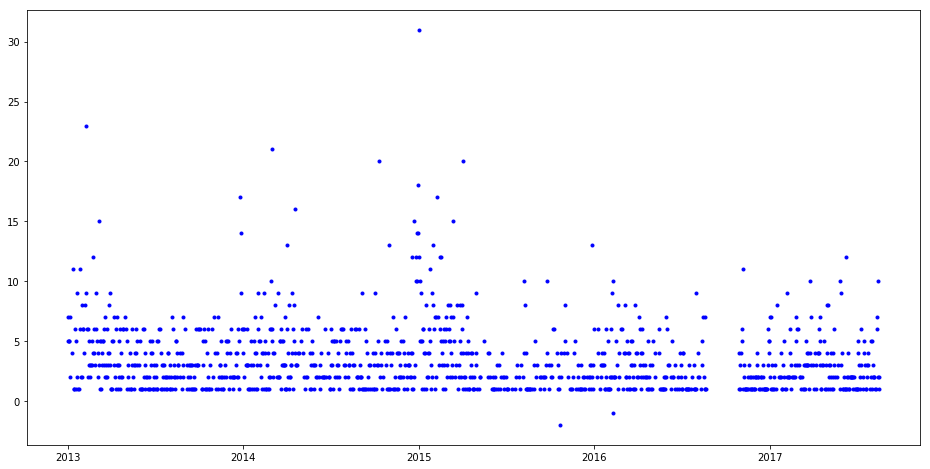

In [5]:
plt.figure(figsize=(16,8))
plt.plot(some_item_data['date'], some_item_data['unit_sales'], 'b.')

In [6]:
%time some_item_fullseries = impute_item_data(some_item_data)

Wall time: 124 ms


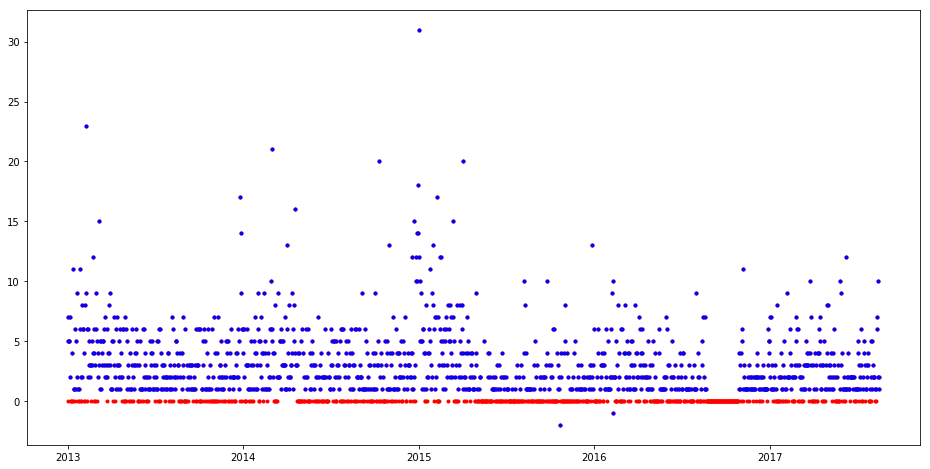

In [7]:
plt.figure(figsize=(16,8))
plt.plot(some_item_fullseries.index, some_item_fullseries.values, 'r.')
plt.plot(some_item_data['date'], some_item_data['unit_sales'], 'b.')

In [8]:
import numpy as np
test_array = np.linspace(0, 10.04, 1005)

In [9]:
test_sereis = pd.Series(test_array)

In [10]:
%time X, y = generate_examples(test_sereis)

Wall time: 0 ns


In [11]:
X

array([[ 0.  ,  0.01,  0.02, ...,  0.97,  0.98,  0.99],
       [ 0.1 ,  0.11,  0.12, ...,  1.07,  1.08,  1.09],
       [ 0.2 ,  0.21,  0.22, ...,  1.17,  1.18,  1.19],
       ..., 
       [ 8.8 ,  8.81,  8.82, ...,  9.77,  9.78,  9.79],
       [ 8.9 ,  8.91,  8.92, ...,  9.87,  9.88,  9.89],
       [ 9.  ,  9.01,  9.02, ...,  9.97,  9.98,  9.99]])

In [12]:
y

array([[  1.  ,   1.01,   1.02,   1.03,   1.04],
       [  1.1 ,   1.11,   1.12,   1.13,   1.14],
       [  1.2 ,   1.21,   1.22,   1.23,   1.24],
       [  1.3 ,   1.31,   1.32,   1.33,   1.34],
       [  1.4 ,   1.41,   1.42,   1.43,   1.44],
       [  1.5 ,   1.51,   1.52,   1.53,   1.54],
       [  1.6 ,   1.61,   1.62,   1.63,   1.64],
       [  1.7 ,   1.71,   1.72,   1.73,   1.74],
       [  1.8 ,   1.81,   1.82,   1.83,   1.84],
       [  1.9 ,   1.91,   1.92,   1.93,   1.94],
       [  2.  ,   2.01,   2.02,   2.03,   2.04],
       [  2.1 ,   2.11,   2.12,   2.13,   2.14],
       [  2.2 ,   2.21,   2.22,   2.23,   2.24],
       [  2.3 ,   2.31,   2.32,   2.33,   2.34],
       [  2.4 ,   2.41,   2.42,   2.43,   2.44],
       [  2.5 ,   2.51,   2.52,   2.53,   2.54],
       [  2.6 ,   2.61,   2.62,   2.63,   2.64],
       [  2.7 ,   2.71,   2.72,   2.73,   2.74],
       [  2.8 ,   2.81,   2.82,   2.83,   2.84],
       [  2.9 ,   2.91,   2.92,   2.93,   2.94],
       [  3.  ,   3.

In [13]:
X.shape

(91, 100)

In [14]:
y.shape

(91, 5)

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [19]:
lin_reg.predict([np.linspace(11, 11.99, 100)])

array([[ 12.  ,  12.01,  12.02,  12.03,  12.04]])

In [20]:
X_train.shape

(72, 100)

In [22]:
X_test.shape

(19, 100)